<a href="https://colab.research.google.com/github/alexk2206/Data_Driven_Fantasy_Football/blob/dev/Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
MIP_sim_2024_dfs = []
for run in range(1, 11):
    url = f"https://raw.githubusercontent.com/alexk2206/Data_Driven_Fantasy_Football/main/simulations/MIP/simulation_results_MIP_ALL_2024_run{run}.json"
    df = pd.read_json(url)
    df["Run"] = run
    MIP_sim_2024_dfs.append(df)

MIP_sim_2024 = pd.concat(MIP_sim_2024_dfs, ignore_index=True)

In [39]:
ADP_sim_2024_dfs = []
for run in range(1, 9):
    url = f"https://raw.githubusercontent.com/alexk2206/Data_Driven_Fantasy_Football/refs/heads/main/simulations/ADP/simulation_results_ADP_ALL_2024_run{run}.json"
    df = pd.read_json(url)
    df["Run"] = run
    ADP_sim_2024_dfs.append(df)

ADP_sim_2024 = pd.concat(ADP_sim_2024_dfs, ignore_index=True)

In [44]:
print(len(MIP_sim_2024))
print(len(ADP_sim_2024))
MIP_sim_2024

3000
4000


,Simulation,Winner,DM-Team,DM-Team-Win,DM-Placement,DM-Points,DM-Picks,Run
0,1,Team 6,Team 3,False,11,1448.18,"[Justin Jefferson (Pick 3), Devon Achane (Pick...",1
1,2,Team 8,Team 1,False,9,1567.48,"[Justin Jefferson (Pick 1), Josh Jacobs (Pick ...",1
2,3,Team 11,Team 4,False,3,1701.66,"[Justin Jefferson (Pick 4), Josh Jacobs (Pick ...",1
3,4,Team 5,Team 4,False,12,1406.36,"[Justin Jefferson (Pick 4), Devon Achane (Pick...",1
4,5,Team 7,Team 10,False,4,1578.22,"[Derrick Henry (Pick 10), Devon Achane (Pick 1...",1
...,...,...,...,...,...,...,...,...
2995,2726,Team 4,Team 3,False,11,1484.84,"[Justin Jefferson (Pick 3), Josh Jacobs (Pick ...",10
2996,2727,Team 6,Team 5,False,6,1652.28,"[Justin Jefferson (Pick 5), Travis Kelce (Pick...",10
2997,2728,Team 1,Team 1,True,1,2025.18,"[Justin Jefferson (Pick 1), Josh Jacobs (Pick ...",10
2998,2729,Team 5,Team 3,False,2,1817.48,"[Justin Jefferson (Pick 3), Devon Achane (Pick...",10


In [41]:
# Konvertierung der Spalte "DM-Team-Win" in boolean (für Berechnungen)
MIP_sim_2024["DM-Team-Win"] = MIP_sim_2024["DM-Team-Win"].astype(bool)

# Kennzahlen berechnen
results = {
    "Anzahl der Simulationen": MIP_sim_2024.shape[0],
    "Anzahl gewonnener Simulationen durch das DM-Team": MIP_sim_2024["DM-Team-Win"].sum(),
    "Anteil gewonnener Simulationen durch das DM-Team": MIP_sim_2024["DM-Team-Win"].mean(),
    "Durchschnittlicher Platz des DM-Teams": MIP_sim_2024["DM-Placement"].mean(),
    "Median der Platzierungen": MIP_sim_2024["DM-Placement"].median(),
    "Durchschnittliche Punkte des DM-Teams": MIP_sim_2024["DM-Points"].mean(),
    "Standardabweichung der Punkte": MIP_sim_2024["DM-Points"].std()
}

results


{'Anzahl der Simulationen': 3000,
 'Anzahl gewonnener Simulationen durch das DM-Team': np.int64(462),
 'Anteil gewonnener Simulationen durch das DM-Team': np.float64(0.154),
 'Durchschnittlicher Platz des DM-Teams': np.float64(5.303),
 'Median der Platzierungen': 5.0,
 'Durchschnittliche Punkte des DM-Teams': np.float64(1726.5483666666667),
 'Standardabweichung der Punkte': 152.8755840093318}

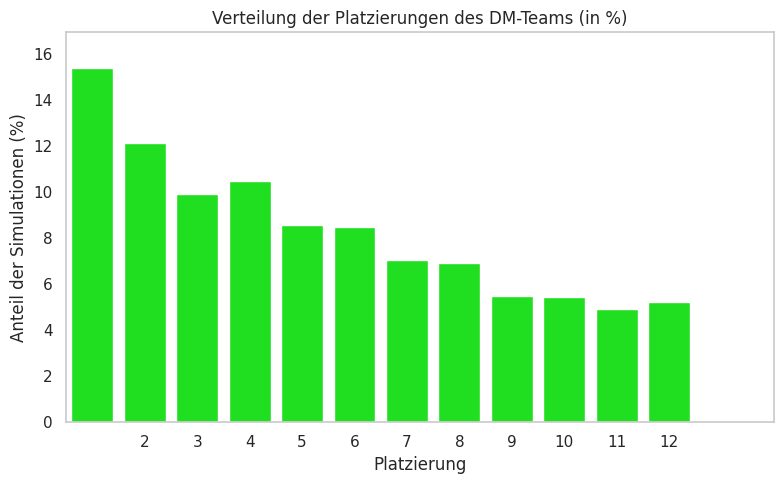

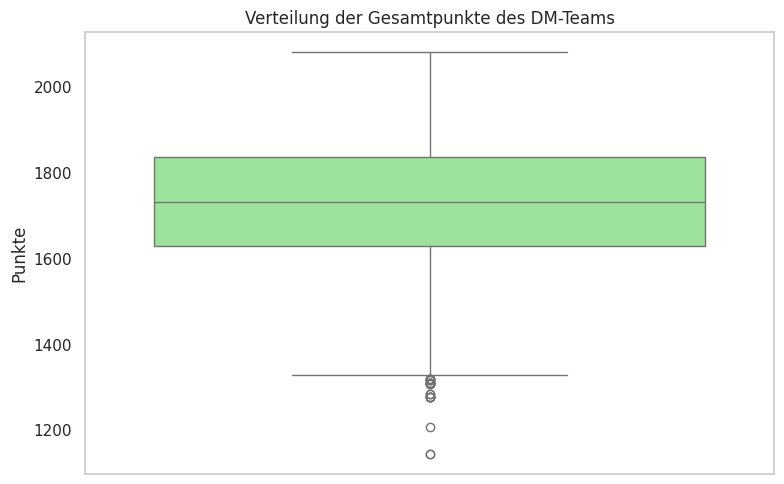

/tmp/ipython-input-2-1818198241.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dm_wins.index.map({True: "Gewonnen", False: "Nicht gewonnen"}), y=dm_wins.values, palette='pastel')


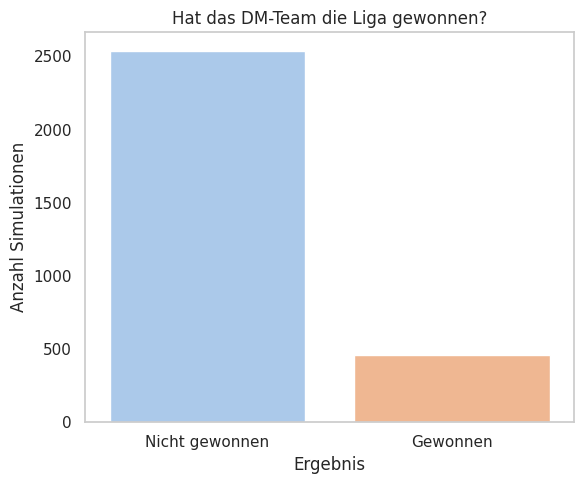

/tmp/ipython-input-2-1818198241.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_all, x="Winner", order=df_all["Winner"].value_counts().index, palette='muted')


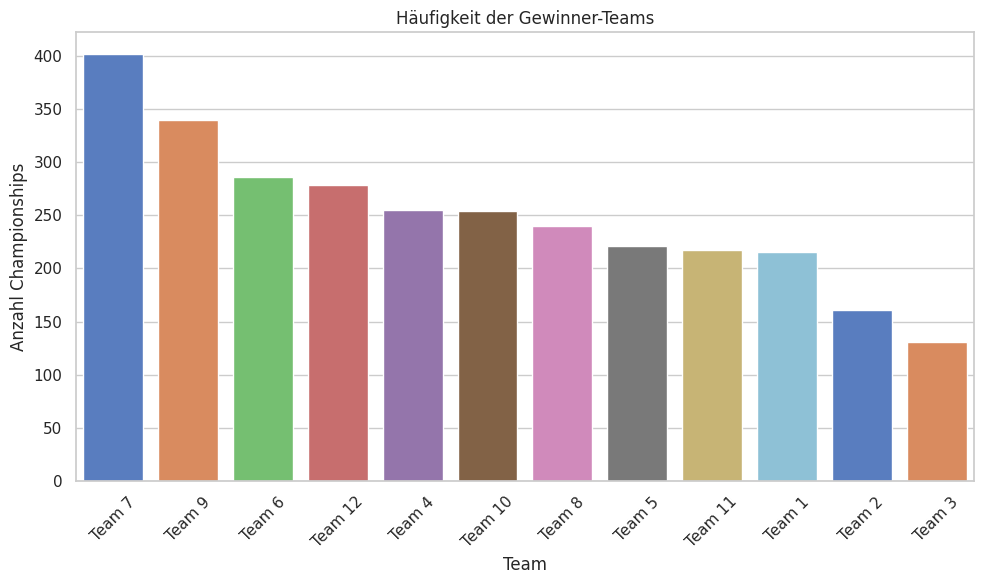

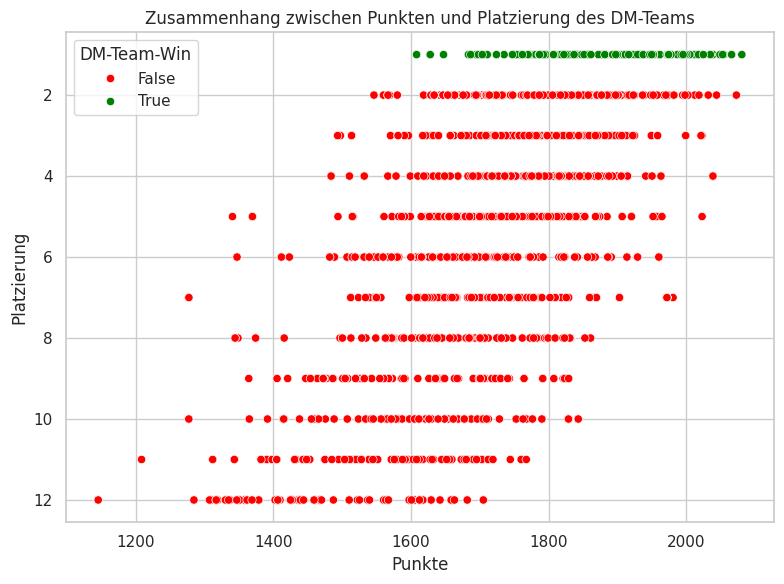

In [2]:
sns.set_theme(style="whitegrid", palette="bright")

# Plot 1: Histogramm der Platzierungen des DM-Teams mit relativen Häufigkeiten (Prozent)
# Platzierungsverteilung berechnen (in Prozent)
placement_counts = MIP_sim_2024["DM-Placement"].value_counts(normalize=True).sort_index() * 100

# Plot: Barplot der Platzierungen in Prozent
plt.figure(figsize=(8, 5))
sns.barplot(x=placement_counts.index, y=placement_counts.values, color="lime")

plt.title("Verteilung der Platzierungen des DM-Teams (in %)")
plt.xlabel("Platzierung")
plt.ylabel("Anteil der Simulationen (%)")
plt.xticks(range(1, 14))
plt.ylim(0, placement_counts.max() * 1.1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot 2: Boxplot der Punkte des DM-Teams
plt.figure(figsize=(8, 5))
sns.boxplot(y=MIP_sim_2024["DM-Points"], color='lightgreen')
plt.title("Verteilung der Gesamtpunkte des DM-Teams")
plt.ylabel("Punkte")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot 3: Anzahl gewonnener Ligen durch das DM-Team
dm_wins = MIP_sim_2024["DM-Team-Win"].value_counts()
plt.figure(figsize=(6, 5))
sns.barplot(x=dm_wins.index.map({True: "Gewonnen", False: "Nicht gewonnen"}), y=dm_wins.values, palette='pastel')
plt.title("Hat das DM-Team die Liga gewonnen?")
plt.ylabel("Anzahl Simulationen")
plt.xlabel("Ergebnis")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot 4: Häufigkeit der Champion-Teams
plt.figure(figsize=(10, 6))
sns.countplot(data=MIP_sim_2024, x="Winner", order=MIP_sim_2024["Winner"].value_counts().index, palette='muted')
plt.title("Häufigkeit der Gewinner-Teams")
plt.xlabel("Team")
plt.ylabel("Anzahl Championships")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 5: Punkte vs. Platzierung des DM-Teams
plt.figure(figsize=(8, 6))
sns.scatterplot(data=MIP_sim_2024, x="DM-Points", y="DM-Placement", hue="DM-Team-Win", palette={True: "green", False: "red"})
plt.title("Zusammenhang zwischen Punkten und Platzierung des DM-Teams")
plt.xlabel("Punkte")
plt.ylabel("Platzierung")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()
